In [3]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind, mannwhitneyu
import statsmodels.api as sm
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Appropriate Statistical Methods to test hypothesis 

In [4]:
# Set seaborn style for plots
sns.set(style='whitegrid')

In [5]:
conn = sql.connect('C:/Users/Adekoyejo.dada/Desktop/3signet/3signet/Pharm_Data/Pharm_data.db', check_same_thread=False)
cursor = conn.cursor()

In [6]:
data = pd.read_csv('C:/Users/Adekoyejo.dada/Desktop/3signet/3signet/Week_7/Pharm_Data.csv', encoding = 'latin-1')
print(data.head())

              Distributor                         Customer Name     City  \
0  Gottlieb-Cruickshank                 Zieme, Doyle and Kunze    Lublin   
1  Gottlieb-Cruickshank                              Feest PLC   ?wiecie   
2  Gottlieb-Cruickshank    Medhurst-Beer Pharmaceutical Limited   Rybnik   
3  Gottlieb-Cruickshank                   Barton Ltd Pharma Plc  Czelad?   
4  Gottlieb-Cruickshank                    Keeling LLC Pharmacy  Olsztyn   

  Country  Latitude  Longitude   Channel  Sub-channel            Product Name  \
0  Poland   51.2333    22.5667  Hospital      Private              Topipizole   
1  Poland   53.4167    18.4333  Pharmacy       Retail            Choriotrisin   
2  Poland   50.0833    18.5000  Pharmacy  Institution               Acantaine   
3  Poland   50.3333    19.0833  Hospital      Private    Lioletine Refliruvax   
4  Poland   53.7800    20.4942  Pharmacy       Retail  Oxymotroban Fexoformin   

      Product Class  Quantity  Price   Sales    Month  Y

In [13]:
df = pd.read_excel('C:/Users/Adekoyejo.dada/Desktop/3signet/3signet/Week_7/Pharm_Data.xlsx')

In [7]:
data = pd.read_sql_query('SELECT * fROM Pharm_data', conn)

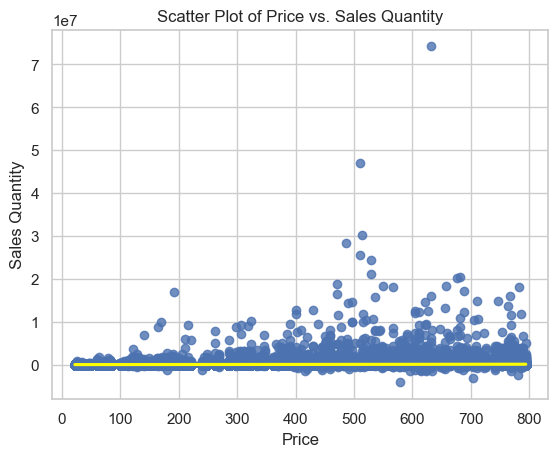

In [8]:
# Scatter plot with Regression Line (Price vs Sales)
sns.regplot(x='Price', y='Sales', data=data, ci=None, line_kws={"color": "yellow"})
plt.title('Scatter Plot of Price vs. Sales Quantity')
plt.xlabel('Price')
plt.ylabel('Sales Quantity')
plt.savefig('scatter_price_vs_sales.png')
plt.show()


This scatter plot above visualizes the relationship between price and sales quantity. Here’s a quick analysis based on the plot:

### Observations:

1. Trend: There seems to be no strong linear relationship between price and sales quantity. The data points are scattered without showing a clear pattern of increase or decrease.
2. Outliers: A few points have significantly high sales quantities, which could be outliers worth investigating.
3. Cluster: Most of the data points are clustered at lower sales quantities across the range of prices.
4. Regression Line: The red regression line appears almost flat, indicating a very weak correlation between price and sales quantity.
5. Possible Interpretations:No Strong Correlation: The flat regression line suggests price might not be a significant predictor of sales quantity, or the relationship could be influenced by other factors other than price such as product demand, marketing, regional preferences) may have a greater impact on sales quantities.

In [9]:
correlation, p_value = pearsonr(data['Price'], data['Sales'])
print(f"Hypothesis 1: Correlation: {correlation}, P-value: {p_value}")

Hypothesis 1: Correlation: 0.07066521223424452, P-value: 1.4141846626464404e-278


# Advanced Statistical Analysis to show relationship between variables

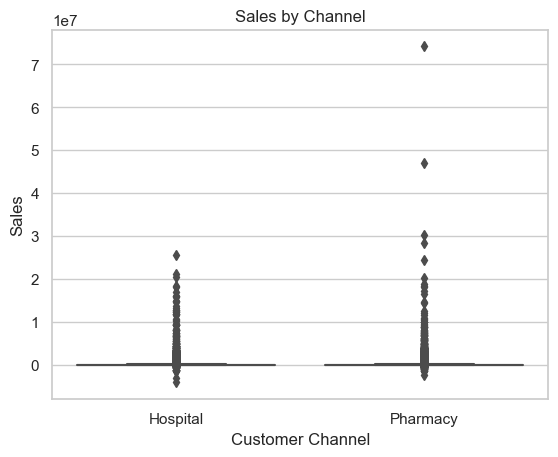

In [10]:
sns.boxplot(x='Channel', y='Sales', data=data)
plt.title('Sales by Channel')
plt.xlabel('Customer Channel')
plt.ylabel('Sales')
plt.savefig('boxplot_sales_by_channel.png')
plt.show()

The results for hypothesis 1 "Higher Product prices correlate with lower sales quantities" indicates the following:
Correlation Coefficient (0.0707):A correlation of 0.0707 indicates a very weak positive relationship between price and sales quantity.This suggests that as product prices increase, sales quantities slightly tend to increase, but the relationship is almost negligible.

P-value (1.41e-278):The P-value is extremely small, far below any common significance threshold (e.g., 0.05), indicating that the observed correlation is statistically significant. However, "statistical significance" in this case means that the correlation is unlikely to have occurred due to random chance, not that the relationship is practically meaningful.


This box plot above compares sales performance across two customer channels: Hospitals and Pharmacies. Here's an analysis based on the visualization:

### Observations:
1. Median Sales: The medians for both Hospital and Pharmacy sales channels appear to be similar and relatively low compared to the range of sales values.
2. Outliers: Both channels have significant outliers with extremely high sales, suggesting a few products or transactions dominate sales figures in these channels.
3. Distribution: The sales data in both channels are heavily skewed, with most data points concentrated near the lower end of the sales scale.
4. Spread: The interquartile range (IQR) for both channels is narrow, indicating that most of the sales data falls within a small range, except for the outliers.

### Possible Interpretations:
1. Similar Performance: Hospitals and Pharmacies show comparable sales distributions for most of their sales, suggesting no significant difference between these channels in typical sales values.
2. Dominant Outliers: The outliers might represent high-demand products, bulk purchases, or seasonal effects.
3. Skewed Sales: The concentration of data at the lower end might indicate a large number of low-value transactions in both channels.


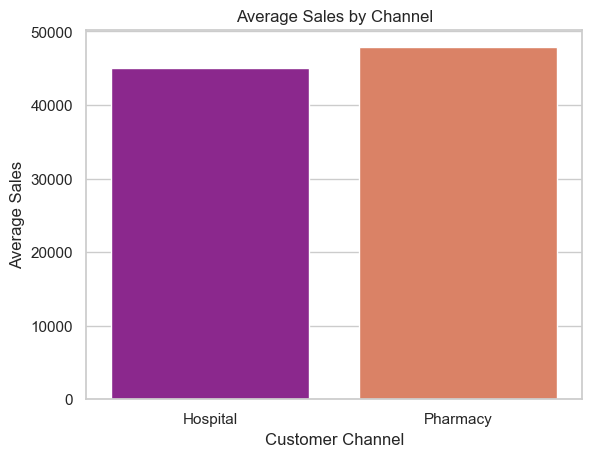

In [11]:
avg_sales = data.groupby('Channel')['Sales'].mean().reset_index()
sns.barplot(x='Channel', y='Sales', data=avg_sales, palette='plasma')
plt.title('Average Sales by Channel')
plt.xlabel('Customer Channel')
plt.ylabel('Average Sales')
plt.savefig('barchart_avg_sales_by_channel.png')
plt.show()

In [25]:
#Here is a list of areas in the data
df["City"].unique()

array(['Lublin', 'Świecie', 'Rybnik', 'Czeladź', 'Olsztyn', 'Olecko',
       'Inowrocław', 'Ciechanów', 'Nidzica', 'Kraków', 'Gubin',
       'Ostrów Mazowiecka', 'Radom', 'Gdańsk', 'Tarnowskie Góry',
       'Łaziska Górne', 'Wągrowiec', 'Lwówek Śląski', 'Złotoryja',
       'Biskupiec', 'Biłgoraj', 'Gniew', 'Bolesławiec', 'Świdnica',
       'Piastów', 'Łódź', 'Rzeszów', 'Lubaczów', 'Świdnik', 'Krapkowice',
       'Brzeg', 'Zakopane', 'Brwinów', 'Bielsko-Biała', 'Wałcz', 'Kęty',
       'Częstochowa', 'Bełchatów', 'Chełmża', 'Poznań', 'Elbląg',
       'Ciechocinek', 'Kłodzko', 'Prabuty', 'Chorzów', 'Grudziądz',
       'Łęczyca', 'Człuchów', 'Dęblin', 'Świnoujście',
       'Gorzów Wielkopolski', 'Nakło nad Notecią', 'Gryfino',
       'Sandomierz', 'Kamień Pomorski', 'Tarnobrzeg', 'Węgorzewo',
       'Sopot', 'Trzebnica', 'Nysa', 'Luboń', 'Żychlin', 'Chojnów',
       'Milanówek', 'Szczytno', 'Siedlce', 'Białystok', 'Pułtusk',
       'Dąbrowa Górnicza', 'Warka', 'Nowe Miasto Lubawskie',
    

In [26]:
unique_cities_count = len(df["City"].unique())
print(unique_cities_count)


749


In [17]:
#List of the major cities in Germany and Poland
urban_cities = ["Lublin", "Rybnik", "Olsztyn", "Inowrocław", "Kraków", 
                "Radom", "Gdańsk", "Tarnowskie Góry", "Łódź", "Rzeszów", 
                "Zakopane", "Bielsko-Biała", "Częstochowa", "Poznań", "Elbląg", 
                "Chorzów", "Grudziądz", "Świnoujście", "Gorzów Wielkopolski", "Sopot", "Nysa", 
                "Luboń", "Białystok", "Siedlce", "Dąbrowa Górnicza", "Piotrków Trybunalski", 
                "Opole", "Gliwice", "Rumia", "Tarnów", "Wrocław", "Bytom", "Wałbrzych", 
                "Kielce", "Sosnowiec", "Katowice", "Szczecin", "Koszalin", "Bydgoszcz", 
                "Toruń", "Zielona Góra", "Suwałki", "Warsaw", "Gdynia", "Gniezno", 
                "Mysłowice", "Włocławek", "Płock", "Kalisz", "Mielec", "Oświęcim", "Biała Podlaska",
                "Hamburg", "Berlin", "Munich", "Cologne", "Stuttgart", "Leipzig", "Dortmund", "Düsseldorf", 
                "Bremen", "Essen", "Hanover", "Dresden", "Frankfurt", "Nuremberg", "Bochum", "Karlsruhe", 
                "Mannheim", "Augsburg", "Lübeck", "Kiel", "Magdeburg", "Potsdam", "Mainz", "Wiesbaden", "Münster", 
                "Rostock", "Freiburg", "Braunschweig", "Halle", "Erfurt", "Bonn", "Darmstadt", "Jena", "Würzburg",
                "Aachen", "Mönchengladbach"
]


In [28]:
len(urban_cities)

88

In [20]:
gdf =pd.DataFrame(urban_cities)

In [22]:
# Classify each city as Urban or Rural
gdf["Urban_Rural"] = df["City"].apply(
    lambda city: "Urban" if city in urban_cities else "Rural"
)

In [23]:
print (gdf)

                  0 Urban_Rural
0            Lublin       Urban
1            Rybnik       Rural
2           Olsztyn       Urban
3        Inowrocław       Rural
4            Kraków       Urban
..              ...         ...
83        Darmstadt       Rural
84             Jena       Rural
85         Würzburg       Rural
86           Aachen       Urban
87  Mönchengladbach       Urban

[88 rows x 2 columns]
